(47, 3) (47,)
(37, 3) (10, 3) (37,) (10,)
[0. 6. 8.] cost is 85710.69545516712
[0.01094067 5.03127007 7.06856877] cost is 62800.3629274629
[0.01688593 4.21398021 6.26432534] cost is 46119.96687370327
[0.01899113 3.52539179 5.56891566] cost is 33967.2473822772
[0.01819579 2.94614438 4.96667914] cost is 25105.819621071707
[0.01526014 2.45975529 4.4442514 ] cost is 18637.594427697637
[0.01079579 2.05219324 3.99022564] cost is 13910.146201553374
[0.0052915  1.71151508 3.59486407] cost is 10449.453667618254
[-8.65295027e-04  1.42755631e+00  3.24985200e+00] cost is 7911.062411612957
[-0.00737048  1.19166745  2.94808815] cost is 6044.622596886679
[-0.01398823  0.99648936  2.68350605] cost is 4668.137937040162
[-0.02053842  0.8357619   2.45092171] cost is 3649.2658106926506
[-0.02688627  0.70416091  2.24590386] cost is 2891.737176996663
[-0.03293362  0.59715929  2.06466325] cost is 2325.494046706837
[-0.03861176  0.51090867  1.9039584 ] cost is 1899.5263965338806
[-0.0438755   0.44213864  1.76

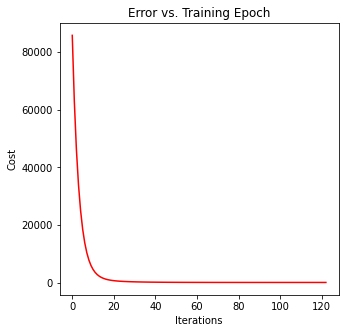

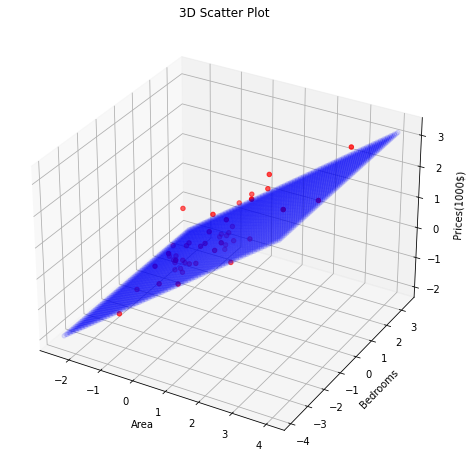

[0. 6. 8.] cost is 85710.69545516712
[0.01094067 5.03127007 7.06856877] cost is 62800.3629274629
[0.01688593 4.21398021 6.26432534] cost is 46119.96687370327
[0.01899113 3.52539179 5.56891566] cost is 33967.2473822772
[0.01819579 2.94614438 4.96667914] cost is 25105.819621071707
[0.01526014 2.45975529 4.4442514 ] cost is 18637.594427697637
[0.01079579 2.05219324 3.99022564] cost is 13910.146201553374
[0.0052915  1.71151508 3.59486407] cost is 10449.453667618254
[-8.65295027e-04  1.42755631e+00  3.24985200e+00] cost is 7911.062411612957
[-0.00737048  1.19166745  2.94808815] cost is 6044.622596886679
[-0.01398823  0.99648936  2.68350605] cost is 4668.137937040162
[-0.02053842  0.8357619   2.45092171] cost is 3649.2658106926506
[-0.02688627  0.70416091  2.24590386] cost is 2891.737176996663
[-0.03293362  0.59715929  2.06466325] cost is 2325.494046706837
[-0.03861176  0.51090867  1.9039584 ] cost is 1899.5263965338806
[-0.0438755   0.44213864  1.76101514] cost is 1576.6693045144832
[-0.048

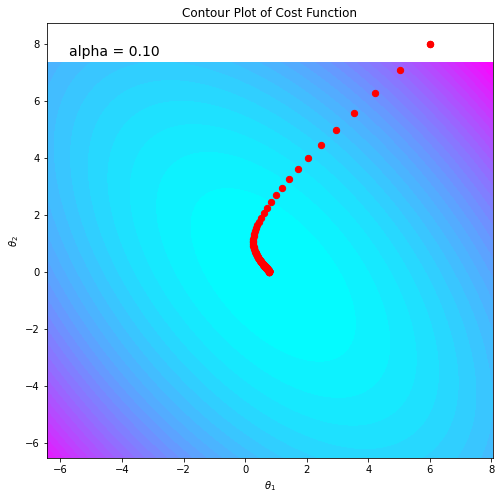

In [4]:
%run LMS.ipynb

In [5]:
#make a function "contour_plot" to plot the contour of the cost function that plot subplots of different learning rates
#has parameters as an array of learning rates
def contour_plot(learning_rates):
    #rescale learning rates into a square matrix
    learning_rates = np.array(learning_rates)
    learning_rates = learning_rates.reshape(9,2)
    print(learning_rates,learning_rates.shape)
    theta1_min, theta1_max = X_train[:,1].min() - 5, X_train[:,1].max() + 5
    theta2_min, theta2_max = X_train[:,2].min() - 5, X_train[:,2].max() + 5
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
            
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    Z = Z.reshape(theta1_grid.shape)
    for u in range(9):
        for j in range(2):
          
            alpha = learning_rates[u][j]
            #plot the contour of the cost function for a given learning rate
            # plt.subplot(3,6,u*6+j+1)
            theta = np.zeros(3)
            theta[1]=6
            theta[2]=8
            theta, theta_list, cost_list = batch_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
            #print total no of iterations
            itrs=len(cost_list)
            print("Total no of iterations:", itrs)
            #Plot a contour plot of the cost function vs theta1 and theta2
            #create a meshgrid of theta1 and theta2
            plt.Subplot(3,6,1)
            # plot contour plot wothout background color and line color based on z values
            plt.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
            # plt.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

            plt.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
            #put alpha value on the plot
            plt.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=plt.transpltes, fontsize=14, verticalalignment='top')
            plt.set_xlabel(r'$\theta_1$')
            plt.set_ylabel(r'$\theta_2$')
            plt.set_title('Contour Plot of Cost Function')
            #plot theta_list on the contour plot
            for i in range(len(theta_list)):
                plt.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
                
    plt.show()

            

[0. 6. 8.] cost is 85710.69545516712
[5.47033699e-03 5.51563503e+00 7.53428438e+00] cost is 73801.66139149255
[0.00969182 5.06913008 7.10036572] cost is 63576.6306364519
[0.01280887 4.65764283 6.69594975] cost is 54796.32677823112
[0.01495241 4.27854206 6.31891056] cost is 47255.52558931726
[0.01624103 3.92939211 5.96727816] cost is 40778.20605100661
[0.01678202 3.60793828 5.63922699] cost is 35213.39205235866
[0.01667232 3.31209351 5.33306527] cost is 30431.586371291785
[0.01599944 3.03992592 5.04722515] cost is 26321.71256358994
[0.01484227 2.78964733 4.78025354] cost is 22788.492406369434
[0.01327182 2.5596026  4.53080369] cost is 19750.196850631928
[0.0113519  2.34825977 4.29762734] cost is 17136.71727693409
[0.00913978 2.15420095 4.07956747] cost is 14887.9114282005
[0.00668674 1.97611385 3.87555155] cost is 12952.18489373734
[0.00403862 1.81278394 3.68458537] cost is 11285.274592448577
[1.23632532e-03 1.66308725e+00 3.50574722e+00] cost is 9849.205483061147
[-1.68377260e-03  1.52

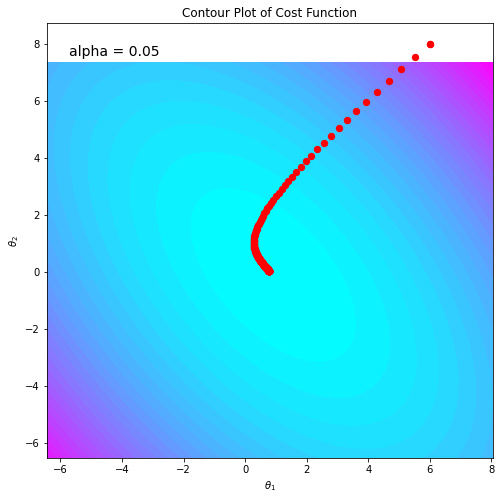

[0. 6. 8.] cost is 85710.69545516712
[0.01094067 5.03127007 7.06856877] cost is 62800.3629274629
[0.01688593 4.21398021 6.26432534] cost is 46119.96687370327
[0.01899113 3.52539179 5.56891566] cost is 33967.2473822772
[0.01819579 2.94614438 4.96667914] cost is 25105.819621071707
[0.01526014 2.45975529 4.4442514 ] cost is 18637.594427697637
[0.01079579 2.05219324 3.99022564] cost is 13910.146201553374
[0.0052915  1.71151508 3.59486407] cost is 10449.453667618254
[-8.65295027e-04  1.42755631e+00  3.24985200e+00] cost is 7911.062411612957
[-0.00737048  1.19166745  2.94808815] cost is 6044.622596886679
[-0.01398823  0.99648936  2.68350605] cost is 4668.137937040162
[-0.02053842  0.8357619   2.45092171] cost is 3649.2658106926506
[-0.02688627  0.70416091  2.24590386] cost is 2891.737176996663
[-0.03293362  0.59715929  2.06466325] cost is 2325.494046706837
[-0.03861176  0.51090867  1.9039584 ] cost is 1899.5263965338806
[-0.0438755   0.44213864  1.76101514] cost is 1576.6693045144832
[-0.048

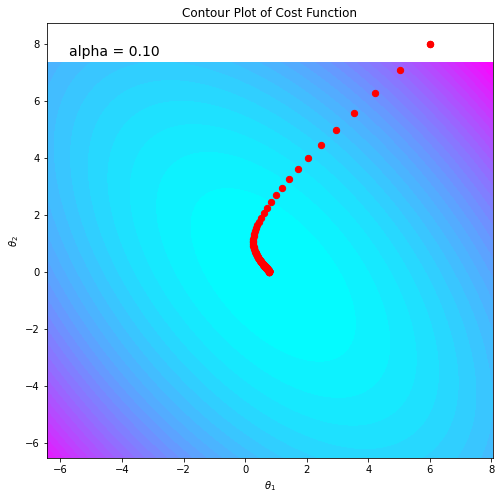

[0. 6. 8.] cost is 85710.69545516712
[0.01641101 4.5469051  6.60285315] cost is 52706.80006307815
[0.02158232 3.43455036 5.49187887] cost is 32626.127330608113
[0.01941332 2.58619291 4.60513219] cost is 20383.99581766663
[0.01271057 1.94219198 3.8943039 ] cost is 12899.603966321894
[0.00346559 1.4562087  3.32170364] cost is 8305.796850816363
[-0.00693445  1.09224966  2.85791145] cost is 5470.553000437074
[-0.01754729  0.82236687  2.47994986] cost is 3707.2090300849463
[-0.02775541  0.62486858  2.16986086] cost is 2598.9644414028244
[-0.0371758   0.48292731  1.91359807] cost is 1892.5861882663978
[-0.04559252  0.38349719  1.70016424] cost is 1434.018162716589
[-0.05290663  0.31647165  1.52093962] cost is 1129.3687324558878
[-0.05909919  0.2740284   1.36915898] cost is 921.2689282477673
[-0.06420417  0.25011984  1.23950426] cost is 774.5412157901587
[-0.06828884  0.24007681  1.12778729] cost is 667.5088691744712
[-0.07143972  0.24030039  1.0307026 ] cost is 586.7232073718853
[-0.07375267

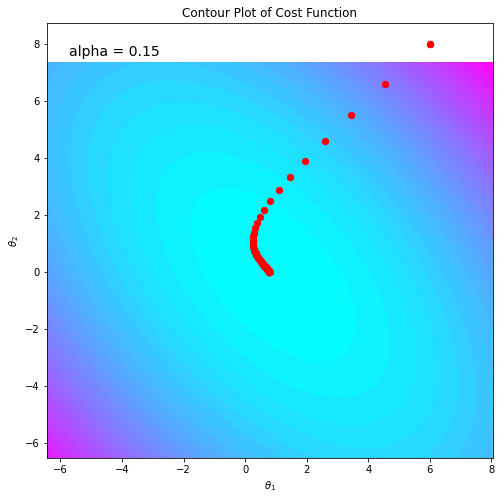

[0. 6. 8.] cost is 85710.69545516712
[0.02188135 4.06254013 6.13713753] cost is 43520.972798338415
[0.02378101 2.73084056 4.78302631] cost is 22439.919576951143
[0.01494197 1.82299223 3.79083377] cost is 11855.544046976742
[1.15338183e-03 1.21113722e+00 3.05682322e+00] cost is 6499.7997358249295
[-0.01407899  0.80545467  2.50764022] cost is 3755.738874686754
[-0.0287389   0.54288747  2.09135581] cost is 2322.0142775578593
[-0.04176464  0.37920668  1.77115601] cost is 1550.4375531677304
[-0.05269155  0.28342565  1.52089478] cost is 1117.3142856084248
[-0.06141573  0.23386848  1.32195996] cost is 860.3262497052197
[-0.06803971  0.21540299  1.16106384] cost is 697.537172532935
[-0.07277373  0.21749359  1.02868521] cost is 587.1482646713017
[-0.07587386  0.23283122  0.91797053] cost is 507.4810031000475
[-0.07760471  0.25636964  0.82395843] cost is 447.0052851530446
[-0.07821805  0.28464758  0.74303231] cost is 399.3599515549408
[-0.07794175  0.31531219  0.67253355] cost is 360.85702550343

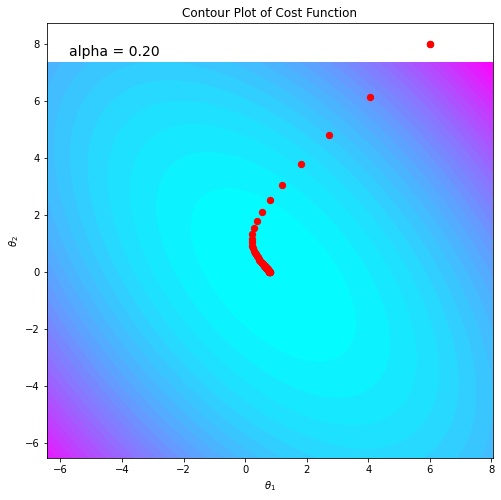

[0. 6. 8.] cost is 85710.69545516712
[0.02735168 3.57817516 5.67142191] cost is 35242.88113324358
[0.02348199 2.10285079 4.13776765] cost is 14965.535588615072
[0.00644359 1.21873576 3.11225485] cost is 6731.931435739822
[-0.01414295  0.70249973  2.41331573] cost is 3321.566467170034
[-0.03351751  0.41390203  1.92579802] cost is 1856.9792298222944
[-0.04964472  0.26500527  1.57649771] cost is 1188.2454670837215
[-0.06195416  0.20078303  1.31872623] cost is 853.4358090083351
[-0.0706108   0.18690594  1.12257328] cost is 665.1937531313158
[-0.07610333  0.20205019  0.96876075] cost is 546.1564394631098
[-0.07902057  0.23305501  0.84476154] cost is 463.3285243031512
[-0.07993746  0.27187482  0.74234672] cost is 401.83870132794345
[-0.07936312  0.31366175  0.65603414] cost is 354.3918179156908
[-0.07772307  0.35556015  0.58210583] cost is 316.990602447512
[-0.07535917  0.39594929  0.51798464] cost is 287.17153996920325
[-0.07253775  0.4339684   0.46183795] cost is 263.25579732250105
[-0.069

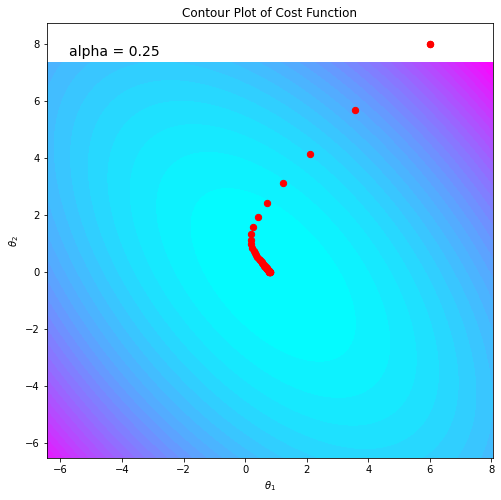

[0. 6. 8.] cost is 85710.69545516712
[0.03282202 3.0938102  5.2057063 ] cost is 27872.52506779369
[0.02068525 1.55058106 3.5561029 ] cost is 9666.55174758058
[-0.00521526  0.75636953  2.55562988] cost is 3806.6401528517536
[-0.03116937  0.37086643  1.92690029] cost is 1825.5330246091967
[-0.05206421  0.20578948  1.51415559] cost is 1086.6275948990462
[-0.06678468  0.15727707  1.22951583] cost is 762.7237416673263
[-0.07589468  0.16830881  1.02304274] cost is 589.9391887949843
[-0.08051441  0.20782124  0.866056  ] cost is 480.96221938820287
[-0.08181221  0.25910589  0.74182757] cost is 404.6449243035764
[-0.08080281  0.31336747  0.64038486] cost is 348.2808286092472
[-0.07829144  0.36615028  0.55560338] cost is 305.63020075076963
[-0.07488186  0.41535858  0.48357582] cost is 273.01105337403806
[-0.07100782  0.4601623   0.42169371] cost is 247.94747721606927
[-0.06696947  0.5003942   0.36812722] cost is 228.6492906197077
[-0.06296643  0.53621975  0.32152801] cost is 213.7759906143045
[-0

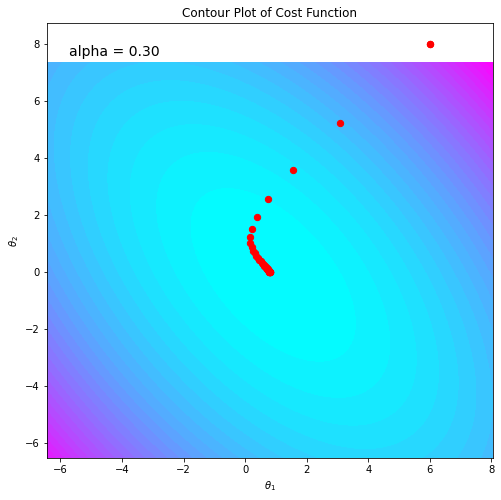

[0. 6. 8.] cost is 85710.69545516712
[0.03829236 2.60944523 4.73999068] cost is 21409.904601988743
[0.01539081 1.07403137 3.03803206] cost is 6065.928841926285
[-0.01916808  0.41883956  2.10719331] cost is 2228.7119806503724
[-0.04824064  0.17589156  1.56473602] cost is 1147.0124489534398
[-0.06786655  0.12130895  1.22344326] cost is 759.8830524373781
[-0.07887206  0.14864249  0.99086116] cost is 571.6890399930213
[-0.08338103  0.20784176  0.82061016] cost is 456.35391758531415
[-0.0834947  0.2758639  0.6888298] cost is 377.13710456662443
[-0.08088879  0.34253077  0.58276167] cost is 320.2644523224189
[-0.07677004  0.4037333   0.4951989 ] cost is 278.78186491006863
[-0.07195234  0.45817444  0.42177461] cost is 248.35282007495024
[-0.06695576  0.50581538  0.35962664] cost is 225.98457486574728
[-0.06209424  0.5471404   0.30673143] cost is 209.52774014339042
[-0.05754331  0.5828144   0.26156484] cost is 197.41553651041193
[-0.05338878  0.61352804  0.22292376] cost is 188.49938950359714
[

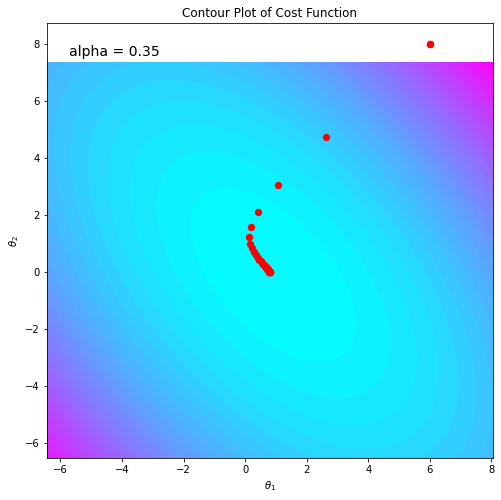

[0. 6. 8.] cost is 85710.69545516712
[0.0437627  2.12508026 4.27427506] cost is 15855.019735828751
[0.00759865 0.67320171 2.58355512] cost is 3746.012065828792
[-0.03454833  0.18909189  1.75317958] cost is 1424.6065346636287
[-0.06399529  0.08229663  1.29802226] cost is 834.2823483441562
[-0.07986803  0.11472891  1.01565324] cost is 596.6172221663046
[-0.08574162  0.19163023  0.81994992] cost is 460.52546109136813
[-0.08533734  0.27634028  0.6729537 ] cost is 370.585640616974
[-0.0814515   0.35557969  0.5568951 ] cost is 308.5539089655061
[-0.07592591  0.42533631  0.4626596 ] cost is 265.256693770804
[-0.06987785  0.48515058  0.38499454] cost is 234.92855043318346
[-0.06393712  0.535821    0.32048844] cost is 213.65948646089785
[-0.05842703  0.57849916  0.26669679] cost is 198.73668894527572
[-0.0534876   0.61434652  0.22174626] cost is 188.2644745243762
[-0.0491543   0.64441626  0.18414222] cost is 180.91481406173503
[-0.04540645  0.66962334  0.15266513] cost is 175.75640447534315
[-0

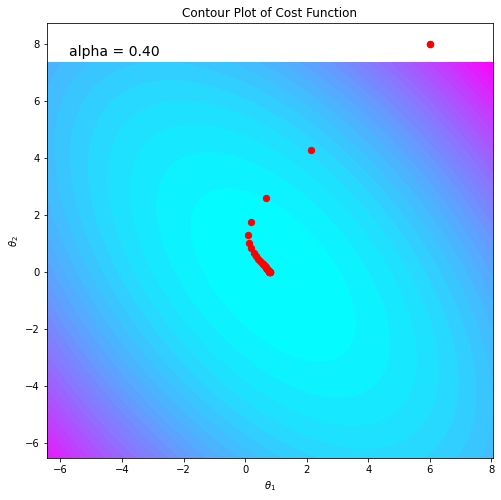

[0. 6. 8.] cost is 85710.69545516712
[0.04923303 1.6407153  3.80855944] cost is 11207.870469313697
[-0.00269121  0.34809209  2.19267209] cost is 2348.5310195626466
[-0.05048947  0.05007254  1.47982314] cost is 1029.8008930274846
[-0.07739568  0.05987046  1.10199861] cost is 671.9972293163768
[-0.08767104  0.15251774  0.86254974] cost is 494.24639229285566
[-0.08795685  0.25651492  0.69051692] cost is 383.18464325516237
[-0.08317679  0.35096278  0.55808964] cost is 310.08771437275755
[-0.07633101  0.43131864  0.45272946] cost is 261.4408816100986
[-0.06906025  0.49805711  0.36765157] cost is 228.97590431794015
[-0.06217707  0.55296424  0.29849922] cost is 207.29118134401097
[-0.05602784  0.5979665   0.24212583] cost is 192.80228400594862
[-0.05071204  0.6347942   0.19610741] cost is 183.12003155808105
[-0.04620719  0.66491357  0.15851715] cost is 176.6494468334907
[-0.04243688  0.68954043  0.12780107] cost is 172.3250827190106
[-0.0393065   0.70967439  0.10269747] cost is 169.4350272325

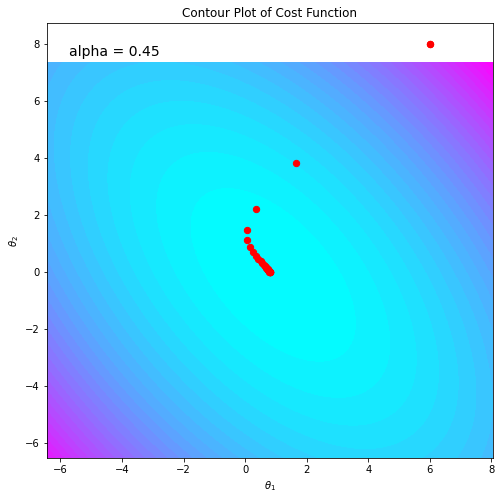

[0. 6. 8.] cost is 85710.69545516712
[0.05470337 1.15635033 3.34284383] cost is 7468.456802443587
[-0.01547879  0.09870251  1.86538296] cost is 1574.5997095003552
[-0.06612499 -0.01527247  1.27335843] cost is 830.1306355735996
[-0.08772793  0.08346915  0.95594489] cost is 568.7839761786722
[-0.09139971  0.21146709  0.74417908] cost is 419.1706043610099
[-0.08648333  0.32630732  0.58662938] cost is 325.73104452625444
[-0.07837153  0.42117905  0.46422643] cost is 266.5872476784643
[-0.06974173  0.49767123  0.36760854] cost is 229.04599718590205
[-0.06176488  0.55887356  0.29089907] cost is 205.19692825404067
[-0.05485389  0.60772203  0.22985931] cost is 190.0416524839454
[-0.04906809  0.64667955  0.18124284] cost is 180.4098927115546
[-0.04431752  0.6777411   0.14250441] cost is 174.28826948823206
[-0.04046139  0.70250513  0.11163015] cost is 170.3975043338428
[-0.03735283  0.72224797  0.08702058] cost is 167.92460546892457
[-0.03485747  0.73798765  0.06740313] cost is 166.35287225217138

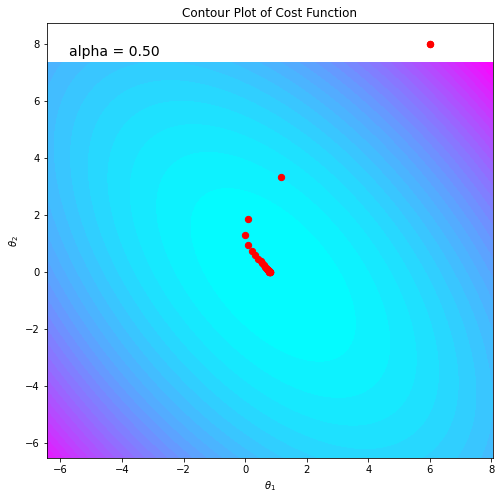

[0. 6. 8.] cost is 85710.69545516712
[0.06017371 0.67198536 2.87712821] cost is 4636.778735218415
[-0.03076407 -0.07496704  1.60168774] cost is 1184.716548112395
[-0.08058836 -0.0239971   1.1200199 ] cost is 712.8722925867662
[-0.09460197  0.1330161   0.84318117] cost is 491.05649534193753
[-0.09156278  0.2768152   0.64737983] cost is 360.7747698214114
[-0.08242822  0.39257787  0.4993611 ] cost is 282.54220345084923
[-0.07219683  0.48326198  0.38535476] cost is 235.38819786306348
[-0.06282456  0.55385326  0.29706667] cost is 206.93709905018443
[-0.05490165  0.60872258  0.22857123] cost is 189.7649841052113
[-0.04845798  0.65135711  0.1753928 ] cost is 179.39934139813482
[-0.04332239  0.68448261  0.13409212] cost is 173.14207657269944
[-0.03927436  0.71021962  0.10201052] cost is 169.36480587939073
[-0.03610327  0.73021611  0.07708768] cost is 167.0846032825962
[-0.03362783  0.7457525   0.0577251 ] cost is 165.7081250558395
[-0.03169931  0.75782362  0.04268182] cost is 164.8771931211549

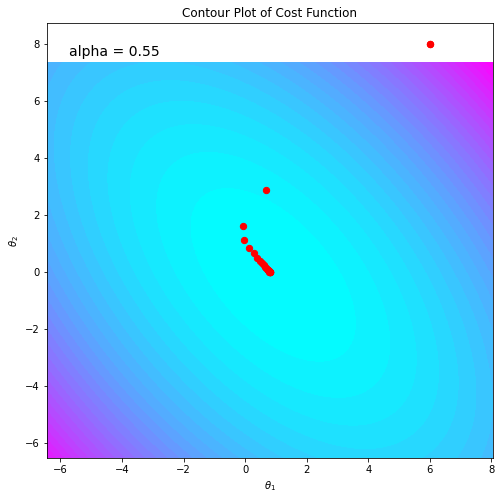

[0. 6. 8.] cost is 85710.69545516712
[0.06564404 0.18762039 2.41141259] cost is 2712.8362676381917
[-0.04854707 -0.17291654  1.40158643] cost is 998.7643539671976
[-0.09301303  0.00684466  1.006042  ] cost is 627.5672032321185
[-0.09795152  0.19350201  0.75106777] cost is 428.07034983706967
[-0.08891639  0.34037027  0.56429291] cost is 314.8576836056388
[-0.07684607  0.45211354  0.42412708] cost is 250.18284485897084
[-0.06561311  0.53672799  0.31838459] cost is 213.17520812074488
[-0.05627594  0.60075776  0.23848164] cost is 191.98946373081571
[-0.04887723  0.64920706  0.17806265] cost is 179.85975424469297
[-0.04314604  0.68586718  0.13236123] cost is 172.91475684107638
[-0.03875655  0.71360698  0.09778635] cost is 168.9382848360878
[-0.03541408  0.73459709  0.07162674] cost is 166.66148464334643
[-0.03287652  0.75047989  0.05183327] cost is 165.35786100338248
[-0.03095307  0.76249811  0.03685631] cost is 164.61144726718112
[-0.02949631  0.77159208  0.02552366] cost is 164.1840743048

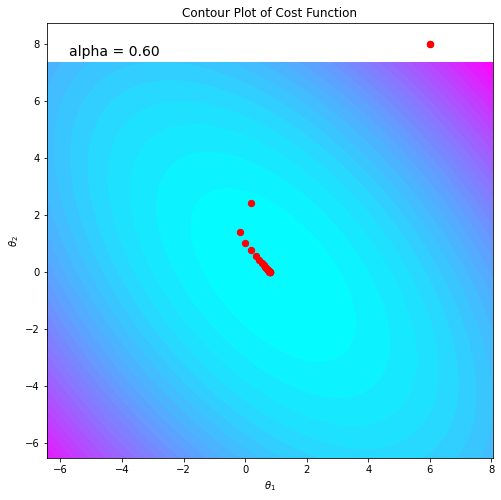

[0. 6. 8.] cost is 85710.69545516712
[ 0.07111438 -0.29674457  1.94569698] cost is 1696.6293997029145
[-0.06882778 -0.19514601  1.26507902] cost is 896.010351731156
[-0.10253249  0.06019884  0.91765917] cost is 556.5867836520991
[-0.09803409  0.25498488  0.67100524] cost is 376.2230178691755
[-0.08432698  0.39863379  0.49087166] cost is 278.8494296683345
[-0.07061063  0.50440811  0.35867859] cost is 226.09710655009152
[-0.05924984  0.58229449  0.26148776] cost is 197.4962253524193
[-0.0504455   0.63964814  0.18997032] cost is 181.98691314412923
[-0.04380955  0.68188288  0.13732339] cost is 173.5764006849183
[-0.03886981  0.71298451  0.09856045] cost is 169.0154421486505
[-0.03521372  0.73588785  0.07001748] cost is 166.54206340018493
[-0.03251495  0.75275396  0.04899906] cost is 165.2007652917443
[-0.03052533  0.76517426  0.03352125] cost is 164.47338749369692
[-0.02905938  0.77432065  0.02212339] cost is 164.07893493386032
[-0.02797958  0.78105609  0.01372997] cost is 163.865025706606

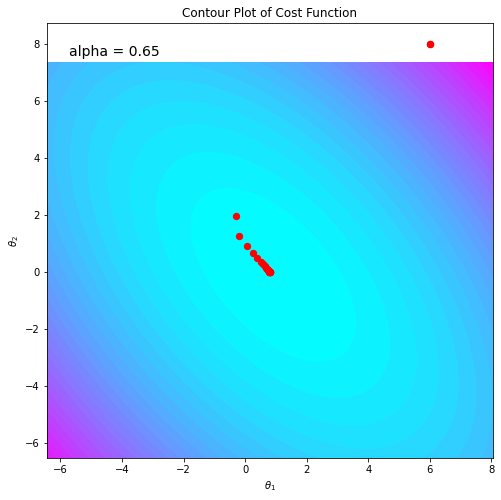

[0. 6. 8.] cost is 85710.69545516712
[ 0.07658472 -0.78110954  1.47998136] cost is 1588.1581314125817
[-0.0916062  -0.14165545  1.19216552] cost is 815.1061721686235
[-0.10828021  0.11901147  0.84110585] cost is 495.43920473319463
[-0.09543101  0.31258999  0.59843437] cost is 333.5902178636437
[-0.07863411  0.45092392  0.42539203] cost is 250.7663233882316
[-0.06435294  0.54998573  0.30175854] cost is 208.30662517416334
[-0.05345521  0.62092285  0.21330403] cost is 186.5329265532322
[-0.04545148  0.67172196  0.14998395] cost is 175.36659124538699
[-0.03966039  0.70810038  0.10464595] cost is 169.64004040561238
[-0.03549555  0.73415195  0.07218026] cost is 166.70322758834266
[-0.03250772  0.75280823  0.04893127] cost is 165.19710773842203
[-0.03036649  0.76616853  0.03228218] cost is 164.42470675443164
[-0.02883262  0.77573623  0.02035932] cost is 164.0285873586316
[-0.02773403  0.78258795  0.01182103] cost is 163.82544083344186
[-0.02694726  0.78749467  0.00570651] cost is 163.72125883

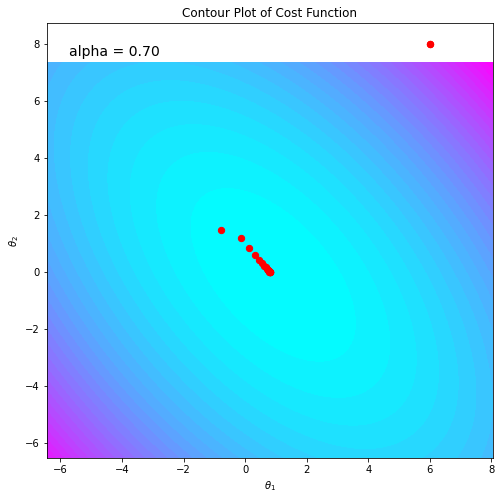

[0. 6. 8.] cost is 85710.69545516712
[ 0.08205505 -1.26547451  1.01426574] cost is 2387.422462767192
[-0.11688233 -0.01244484  1.18284593] cost is 754.0878521419135
[-0.10938966  0.16622857  0.76261651] cost is 442.8174795424347
[-0.09104736  0.36650992  0.53283621] cost is 298.6735510670772
[-0.07251332  0.49749879  0.36696266] cost is 229.0053836662286
[-0.05846557  0.58955785  0.25241738] cost is 195.2757714439309
[-0.04837528  0.65351512  0.17266913] cost is 178.94373753314156
[-0.0412793   0.69803064  0.1171942 ] cost is 171.0355905434658
[-0.0363227   0.72900559  0.07859316] cost is 167.20637452469808
[-0.03286902  0.75055971  0.05173318] cost is 165.35222358481758
[-0.03046462  0.76555819  0.03304271] cost is 164.45442210913347
[-0.02879122  0.77599494  0.02003693] cost is 164.0196961788397
[-0.02762672  0.78325738  0.01098682] cost is 163.80919682050444
[-0.02681637  0.78831097  0.00468928] cost is 163.70727057968452
[-2.62524891e-02  7.91827529e-01  3.07109314e-04] cost is 163

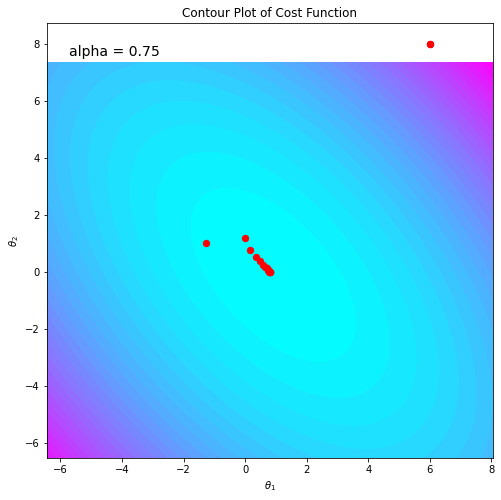

[0. 6. 8.] cost is 85710.69545516712
[ 0.08752539 -1.74983948  0.54855012] cost is 4094.4223937667402
[-0.14465617  0.1924858   1.23712024] cost is 770.3758346112996
[-0.1049943   0.18479618  0.66842557] cost is 400.38896043365736
[-0.08611205  0.42200455  0.47773201] cost is 270.31952137375833
[-0.06633896  0.53767988  0.31403495] cost is 212.2675512863142
[-0.05317302  0.6240135   0.20998935] cost is 185.81680267661847
[-0.04402666  0.68083294  0.13852281] cost is 173.7460801318524
[-0.03785118  0.71949527  0.09046305] cost is 168.2370060342251
[-0.03367009  0.7455638   0.05795536] cost is 165.72264479922572
[-0.03084546  0.76318442  0.03600141] cost is 164.57508055925035
[-0.02893687  0.77508679  0.0211685 ] cost is 164.05132775534204
[-0.02764746  0.78312807  0.01114798] cost is 163.8122849279295
[-0.02677636  0.78856051  0.00437831] cost is 163.70318484688804
[-2.61878649e-02  7.92230548e-01 -1.95113785e-04] cost is 163.6533911433398
[-0.02579029  0.79470994 -0.00328481] cost is 1

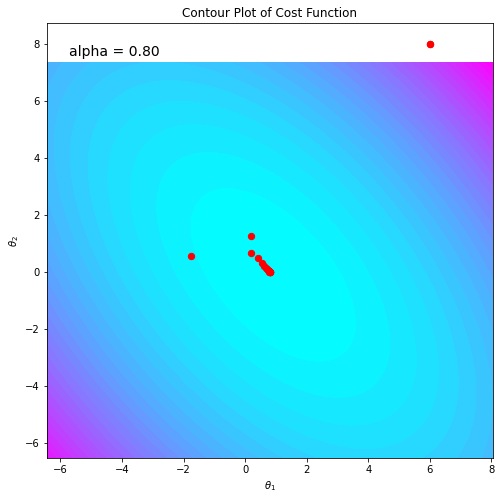

[0. 6. 8.] cost is 85710.69545516712
[ 0.09299573 -2.23420444  0.08283451] cost is 6709.157924411247
[-0.17492772  0.47313647  1.35498845] cost is 980.7749686350185
[-0.09422761  0.15766031  0.54476749] cost is 382.32624582353554
[-0.08217776  0.48940105  0.44068331] cost is 248.75480065599513
[-0.06004704  0.56797538  0.26291327] cost is 199.59064737454872
[-0.04866827  0.65524292  0.17472919] cost is 179.02292600663816
[-0.04032642  0.70320695  0.10965534] cost is 170.22692542686545
[-0.03507641  0.73701487  0.06889213] cost is 166.4521628188375
[-0.03157856  0.75855649  0.04169569] cost is 164.83136974079662
[-0.02930098  0.77283065  0.02399872] cost is 164.1353819051238
[-0.0278047   0.7821438   0.01236971] cost is 163.83651259711257
[-0.02682515  0.78825721  0.00475751] cost is 163.70817265110932
[-2.61830039e-02  7.92260616e-01 -2.32902823e-04] cost is 163.65306111447327
[-0.02576227  0.79488475 -0.00350257] cost is 163.62939520444422
[-0.02548654  0.79660417 -0.00564533] cost is

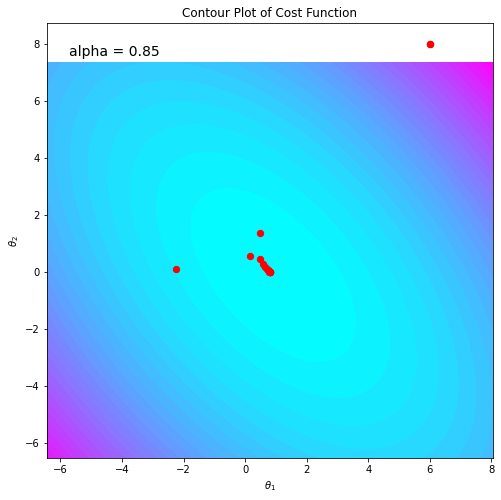

[0. 6. 8.] cost is 85710.69545516712
[ 0.09846607 -2.71856941 -0.38288111] cost is 10231.629054700688
[-0.20769698  0.82950719  1.53645058] cost is 1561.474509369264
[-0.07622307  0.06776699  0.37787671] cost is 434.57949663737134
[-0.08112099  0.58409387  0.43329185] cost is 240.6674164843702
[-0.0529981   0.58020349  0.20626499] cost is 191.13957436362628
[-0.04531559  0.68779454  0.1491092 ] cost is 174.32223126310728
[-0.03704318  0.71960515  0.08395061] cost is 167.88777041705856
[-0.03291414  0.75191833  0.05214877] cost is 165.3312532449676
[-0.02991901  0.76841967  0.02877729] cost is 164.30452975501365
[-0.02814079  0.78023146  0.01498965] cost is 163.89096094961153
[-0.02697052  0.78729     0.00588457] cost is 163.724238095515
[-2.62409905e-02  7.91919043e-01  2.18608790e-04] cost is 163.65701183583985
[-0.0257732   0.79480993 -0.00341789] cost is 163.62990311096266
[-0.02547765  0.79666186 -0.00571439] cost is 163.61897144337144
[-0.02528946  0.79783252 -0.00717695] cost is 

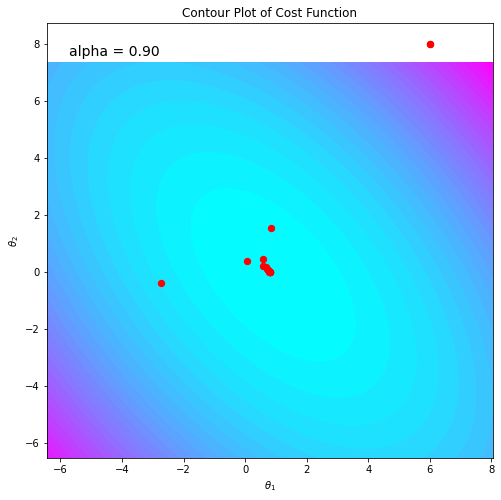

In [6]:
#create an array of learning rates from 0.05 to 0.95 in steps of 0.05
learning_rates = np.arange(0.05, 0.95, 0.05)
# contour_plot(learning_rates)
# k=1
for i in learning_rates:
    #plot a contour plot of the cost function for each learning rate
    #plot subplot for each learning rate
    # plt.subplot(2, 2, k)
    contour(i)
    # k+=1